<h1 style="color:purple;">Min-Max Normalizasyonu</h1>

<p style="color:green; font-weight:bold; font-size:15px;">Min-Max Normalizasyonu, genellikle veri ön işleme aşamasında kullanılan bir tekniktir.</p>
<p style="color:green; font-weight:bold; font-size:15px;">Bu teknik, farklı aralıklarda ifade edilen verileri 0 ile 1 arası bir aralığa dönüştürerek karşılaştırılabilir hale getirmeyi amaçlar.</p>


<h3 style="color:purple;">Çalışma Şekli:</h3>

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

<p style="color:green; font-weight:bold; font-size:15px;"> Veri setindeki her bir özellik (sütun) için en küçük (minimum) ve en büyük (maksimum) değerler bulunur.</p>

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

<p style="color:green; font-weight:bold; font-size:15px;">  Her bir veri noktası için, o özellikteki değerden minimum değerin çıkarılıp, maksimum değer ile minimum değer arasındaki farka bölünür.</p>

\begin{equation}
\text{Normalize Edilmiş Değer} = \frac{x - \min(X)}{\max(X) - \min(X)}
\end{equation}

<p style="color:red; font-weight:bold; font-size:15px;">x: Normalleştirilecek değer</p>
<p style="color:red; font-weight:bold; font-size:15px;">min(X): Veri setindeki özelliğin minimum değeri</p>
<p style="color:red; font-weight:bold; font-size:15px;">max(X): Veri setindeki özelliğin maksimum değeri</p>

<h3 style="color:purple;">Dezavantajları</h3>
<p style="color:green; font-weight:bold; font-size:15px;">  Veri setindeki uç değerlere (outlier) duyarlıdır. Uç değerler normalizasyon işlemini etkileyebilir.</p>
<p style="color:green; font-weight:bold; font-size:15px;"> Veri sıralamasını korur, ancak mesafeleri korumaz. Yani, orijinal veride birbirine yakın olan iki nokta, normalleştirilmiş veride birbirinden çok uzak görünebilir. </p>

<h1 style="color:purple;">Python İle Sağa Çarpık Veri Üzerinde Min-Max Normalizasyonu</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sağa çarpık (sağa çekik) bir dağılım oluşturmak için log-normal dağılım kullanacağız.

mean = 10  # Ortalama
sigma = 1  # Standart sapma

data = np.random.lognormal(mean, sigma, 100000)

# Aykırı değerler oluşturmak için, normal dağılım ile log-normal dağılımın birleşimi olacak şekilde bir veri seti oluşturacağız.

# Normal dağılım parametreleri
normal_mean = 30
normal_sigma = 10

normal_data = np.random.normal(normal_mean, normal_sigma, 5000)

data_with_outliers = np.concatenate((data, normal_data))

# Veriyi bir DataFrame'e dönüştür
df = pd.DataFrame(data_with_outliers, columns=['Değerler'])


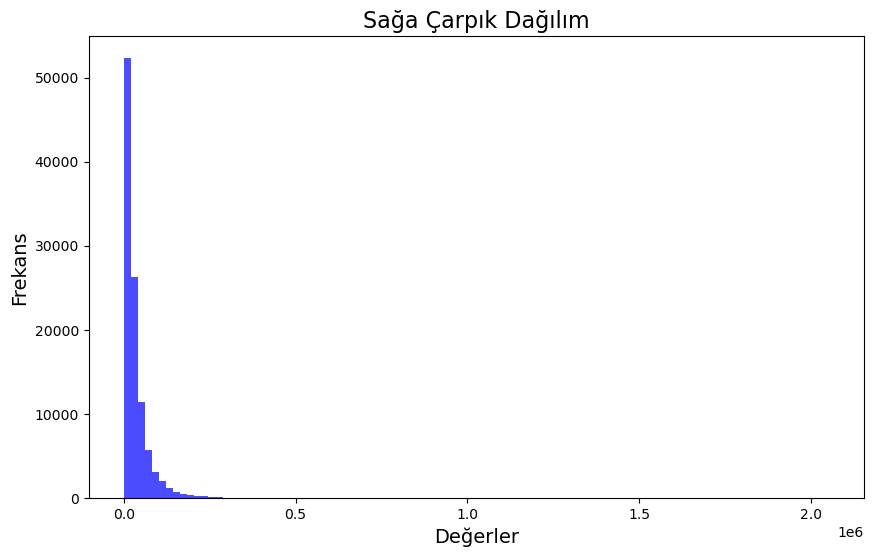

In [2]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=100, color='blue', alpha=0.7)
plt.title('Sağa Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [3]:
df

,Değerler
0,32800.657904
1,86625.138457
2,33070.264185
3,3138.355166
4,13232.685292
...,...
104995,28.900162
104996,42.121206
104997,41.424378
104998,45.163400


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [4]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

-15.936145059711379 2051403.254146608


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [5]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


In [6]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,32800.657904,0.015997
1,86625.138457,0.042235
2,33070.264185,0.016128
3,3138.355166,0.001538
4,13232.685292,0.006458


In [7]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
104995,28.900162,0.000022
104996,42.121206,0.000028
104997,41.424378,0.000028
104998,45.163400,0.000030
104999,30.160155,0.000022


In [8]:
df["Değerler"].describe()

count    1.050000e+05
mean     3.449980e+04
std      4.779612e+04
min     -1.593615e+01
25%      9.912655e+03
50%      2.058817e+04
75%      4.130030e+04
max      2.051403e+06
Name: Değerler, dtype: float64

In [9]:
df["Normalize Edilmiş Değerler"].describe()

count    105000.000000
mean          0.016825
std           0.023299
min           0.000000
25%           0.004840
50%           0.010044
75%           0.020140
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

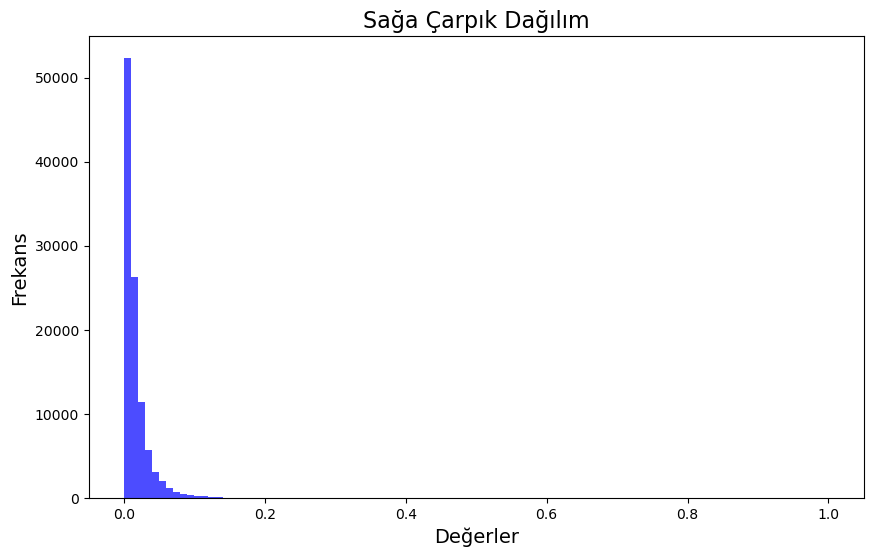

In [10]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df["Normalize Edilmiş Değerler"], bins=100, color='blue', alpha=0.7)
plt.title('Sağa Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [11]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

8179

In [12]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

8179

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Sola Çarpık Veri Üzerinde Min-Max Normalizasyonu</h1>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sola çarpık (sola çekik) bir dağılım oluşturmak için negatif log-normal dağılım kullanacağız.
# Bu, normal bir dağılımı negatif logaritmik olarak dönüştürerek sola çarpık bir dağılım elde eder.
# Negatif log-normal dağılımın parametreleri olan mean ve sigma'yı belirleyebiliriz.

mean = 10  # Ortalama
sigma = 1  # Standart sapma

# Negatif log-normal dağılımı oluşturmak için numpy kütüphanesindeki random.lognormal fonksiyonunu kullanacağız.
# Bu fonksiyon, belirtilen ortalama ve standart sapmaya sahip bir negatif log-normal dağılımı döndürür.

data = np.random.lognormal(mean, sigma, 100000) * -1  # Negatif log-normal dağılımı elde etmek için sonucu -1 ile çarpıyoruz

# Aykırı değerler oluşturmak için, normal dağılım ile negatif log-normal dağılımın birleşimi olacak şekilde bir veri seti oluşturacağız.
# Bunu yapmak için, normal dağılımdan bazı rastgele değerler alıp bunları negatif log-normal dağılıma ekleyeceğiz.

# Normal dağılım parametreleri
normal_mean = -30
normal_sigma = 10

# Normal dağılımdan rastgele değerler oluştur
normal_data = np.random.normal(normal_mean, normal_sigma, 5000)

# Normal dağılım ile negatif log-normal dağılımın birleşimi
data_with_outliers = np.concatenate((data, normal_data))


df = pd.DataFrame(data_with_outliers, columns=['Değerler'])


In [14]:
df.head()

,Değerler
0,-3960.749238
1,-12606.388077
2,-19740.738924
3,-5149.466653
4,-10568.296764


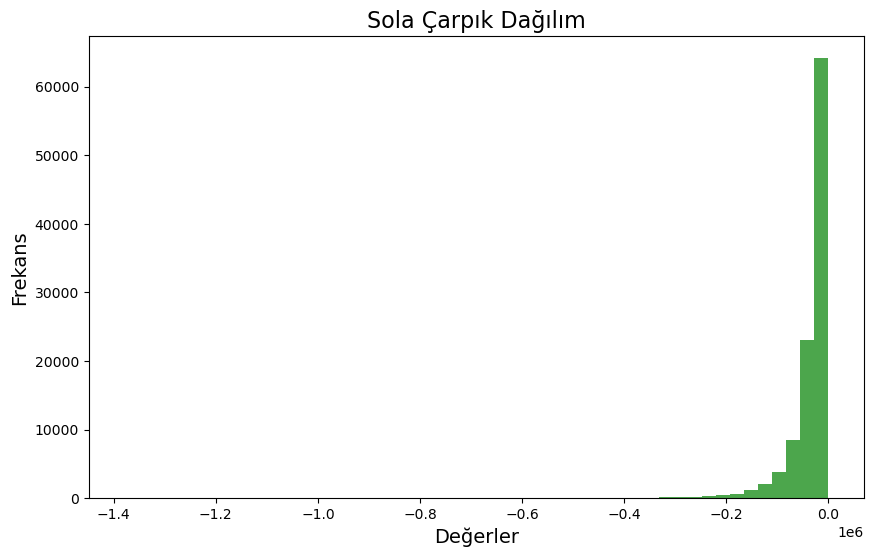

In [15]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(data_with_outliers, bins=50, color='green', alpha=0.7)
plt.title('Sola Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [16]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

-1380106.3716938905 3.6115682605449067


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [17]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


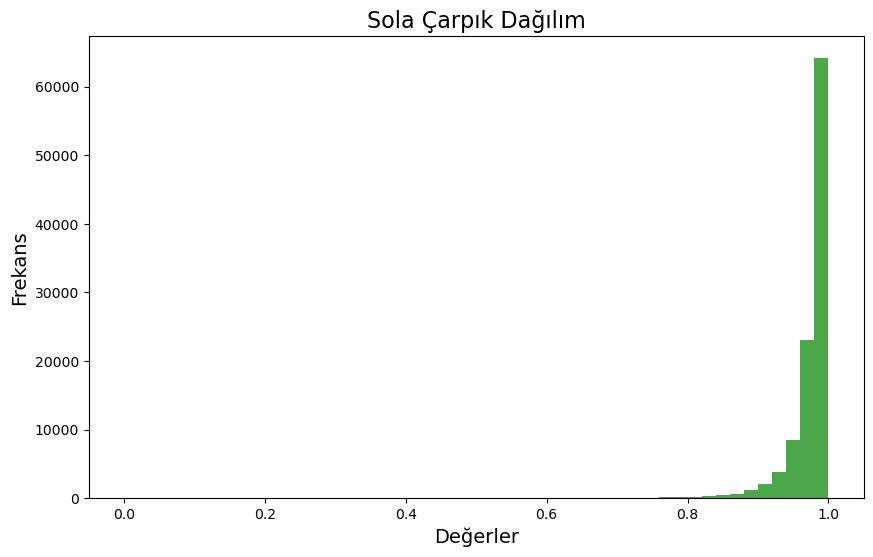

In [18]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'] , bins=50, color='green', alpha=0.7)
plt.title('Sola Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [19]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,-3960.749238,0.997128
1,-12606.388077,0.990863
2,-19740.738924,0.985694
3,-5149.466653,0.996266
4,-10568.296764,0.992340


In [20]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
104995,-35.378565,0.999972
104996,-33.725964,0.999973
104997,-26.100517,0.999978
104998,-36.978055,0.999971
104999,-31.981491,0.999974


In [21]:
df["Değerler"].describe()

count    1.050000e+05
mean    -3.458459e+04
std      4.755425e+04
min     -1.380106e+06
25%     -4.125203e+04
50%     -2.063782e+04
75%     -9.966127e+03
max      3.611568e+00
Name: Değerler, dtype: float64

In [22]:
df['Normalize Edilmiş Değerler'].describe()

count    105000.000000
mean          0.974938
std           0.034457
min           0.000000
25%           0.970107
50%           0.985044
75%           0.992776
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [23]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

8285

In [24]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

8285

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle İki Modlu Veri Üzerinde Min-Max Normalizasyonu</h1>

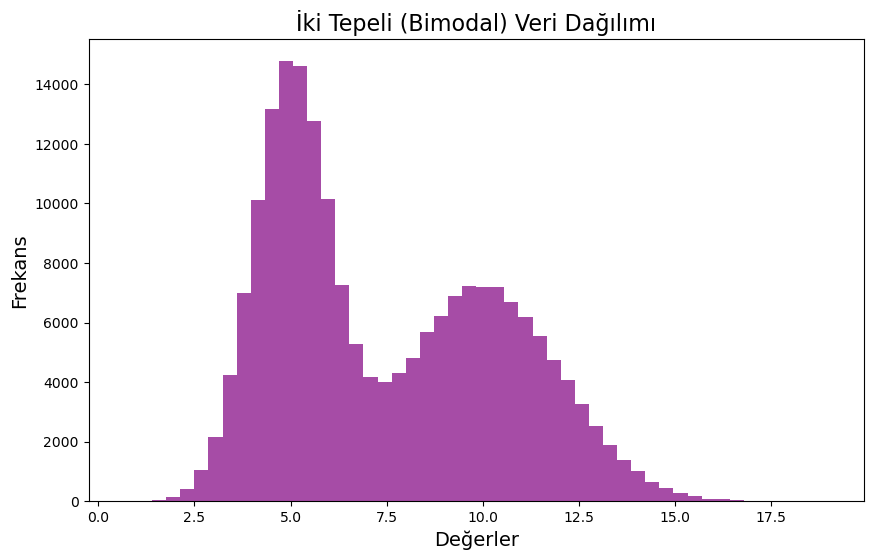

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# İki farklı normal dağılım oluştur
mean1 = 5
std1 = 1
data1 = np.random.normal(mean1, std1, 100000)

mean2 = 10
std2 = 2
data2 = np.random.normal(mean2, std2, 100000)

# İki dağılımı birleştir
bimodal_data = np.concatenate((data1, data2))

# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(bimodal_data, bins=50, color='purple', alpha=0.7)
plt.title('İki Tepeli (Bimodal) Veri Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [26]:
df = pd.DataFrame(bimodal_data, columns=['Değerler'])
df

,Değerler
0,5.205701
1,4.804299
2,5.049721
3,3.661589
4,5.486038
...,...
199995,11.803242
199996,11.658344
199997,8.773348
199998,14.692283


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [27]:
min_val = df['Değerler'].min()

max_val = df['Değerler'].max()
print(min_val,max_val)

0.668674921842979 18.982551648390814


<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [28]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


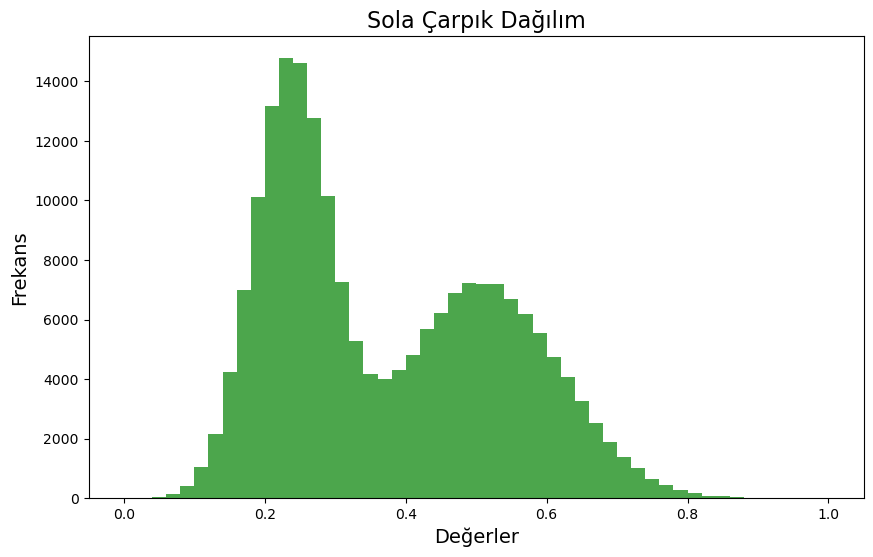

In [29]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'] , bins=50, color='green', alpha=0.7)
plt.title('Sola Çarpık Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


In [30]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,5.205701,0.247737
1,4.804299,0.225819
2,5.049721,0.239220
3,3.661589,0.163423
4,5.486038,0.263044


In [31]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
199995,11.803242,0.607985
199996,11.658344,0.600073
199997,8.773348,0.442543
199998,14.692283,0.765737
199999,7.897295,0.394707


In [32]:
df['Değerler'].describe()

count    200000.000000
mean          7.504056
std           2.962811
min           0.668675
25%           4.986157
50%           6.658985
75%          10.003768
max          18.982552
Name: Değerler, dtype: float64

In [33]:
df['Normalize Edilmiş Değerler'].describe()

count    200000.000000
mean          0.373235
std           0.161780
min           0.000000
25%           0.235749
50%           0.327091
75%           0.509728
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>

In [34]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

9

In [35]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

9

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Log-Normal Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [36]:
data = np.random.lognormal(mean=0, sigma=1, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])

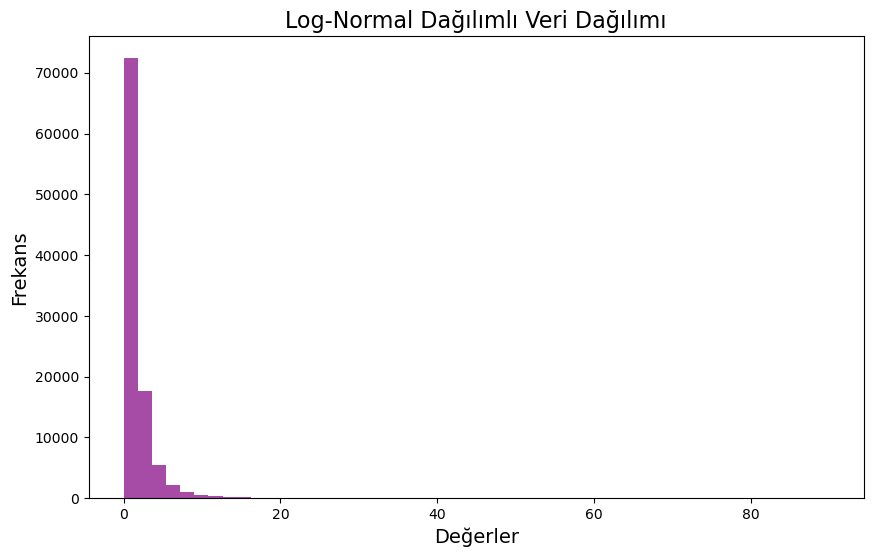

In [37]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='purple', alpha=0.7)
plt.title('Log-Normal Dağılımlı Veri Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()


<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [38]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [39]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


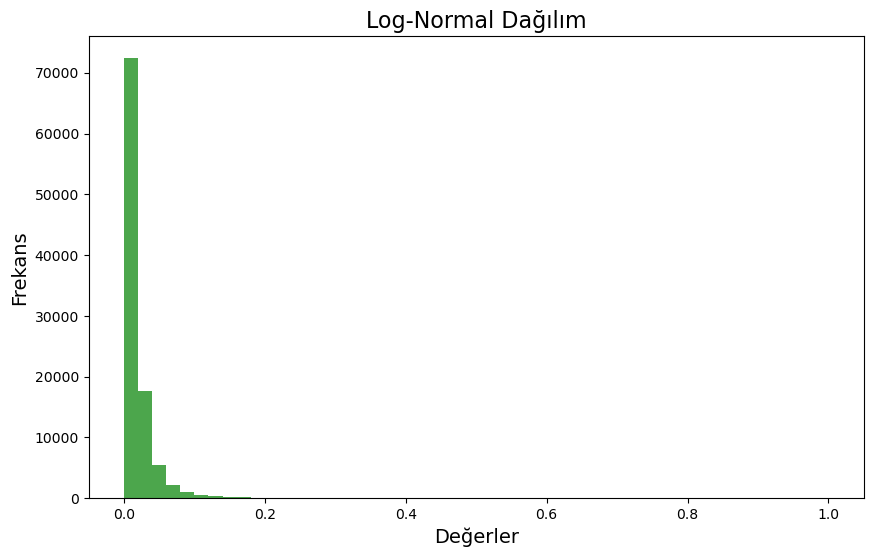

In [40]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Log-Normal Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [41]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,8.859305,0.098395
1,1.225447,0.013498
2,0.391165,0.004220
3,0.837729,0.009186
4,0.626115,0.006833


In [42]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,0.776104,0.008501
99996,7.657156,0.085026
99997,1.653418,0.018258
99998,2.493085,0.027596
99999,0.753476,0.008249


In [43]:
df['Değerler'].describe()

count    100000.000000
mean          1.640730
std           2.141862
min           0.011689
25%           0.508816
50%           0.997454
75%           1.959970
max          89.930803
Name: Değerler, dtype: float64

In [44]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.018117
std           0.023820
min           0.000000
25%           0.005529
50%           0.010963
75%           0.021667
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [45]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

7717

In [46]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

7717

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Beta Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [47]:
data = np.random.beta(a=2, b=5, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])


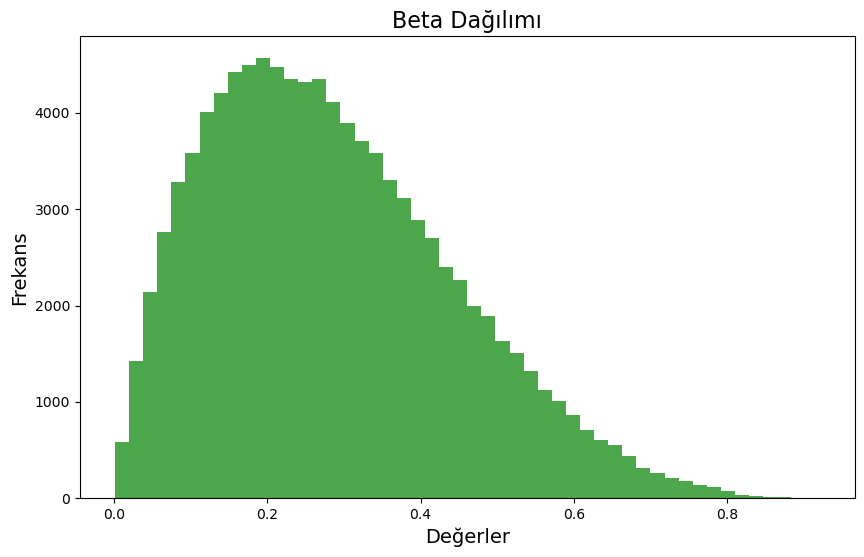

In [48]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='green', alpha=0.7)
plt.title('Beta Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [49]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [50]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


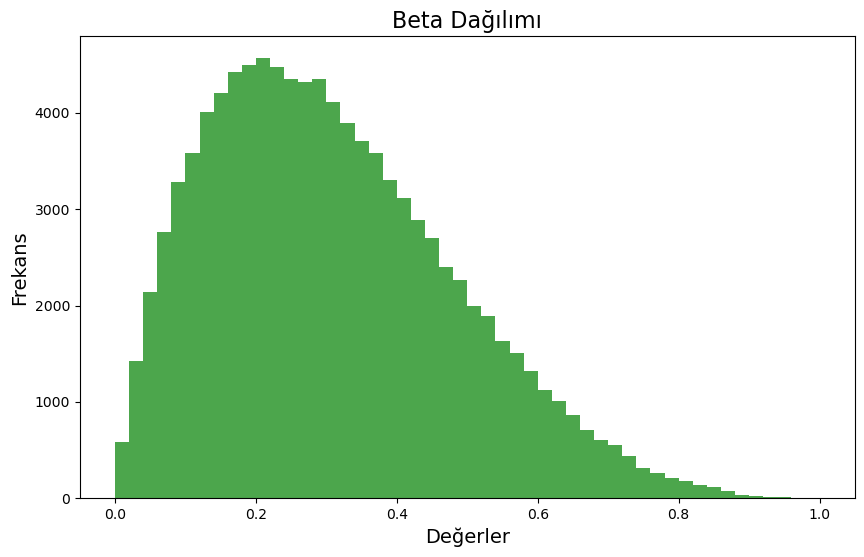

In [51]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Beta Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [52]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,0.720649,0.782727
1,0.197263,0.213224
2,0.387273,0.419977
3,0.219980,0.237943
4,0.029931,0.031148


In [53]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,0.293281,0.317702
99996,0.232682,0.251764
99997,0.234382,0.253613
99998,0.135726,0.146264
99999,0.265306,0.287262


In [54]:
df['Değerler'].describe()

count    100000.000000
mean          0.285345
std           0.159623
min           0.001306
25%           0.160786
50%           0.264124
75%           0.389136
max           0.920328
Name: Değerler, dtype: float64

In [55]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.309067
std           0.173688
min           0.000000
25%           0.173532
50%           0.285976
75%           0.422004
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [56]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)


649

In [57]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

649

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle Uniform Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [58]:
data = np.random.uniform(low=0, high=10, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])


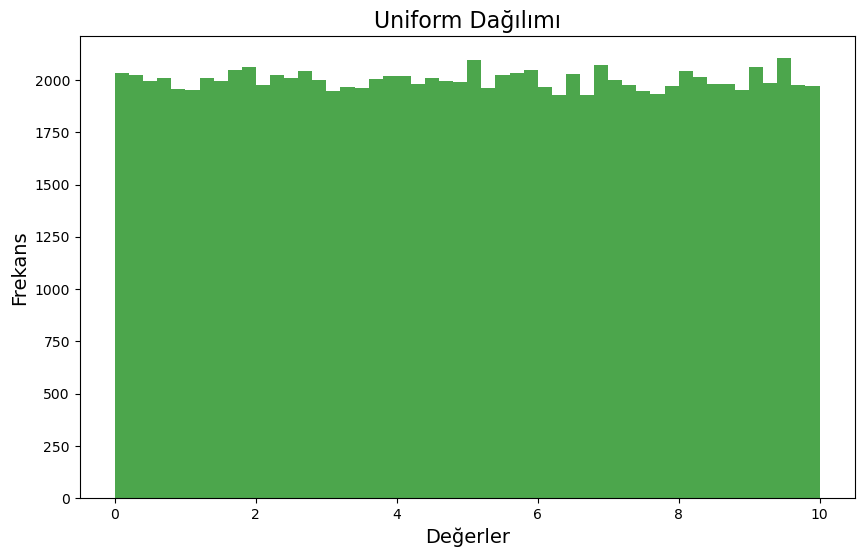

In [59]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df, bins=50, color='green', alpha=0.7)
plt.title('Uniform Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [60]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [61]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)

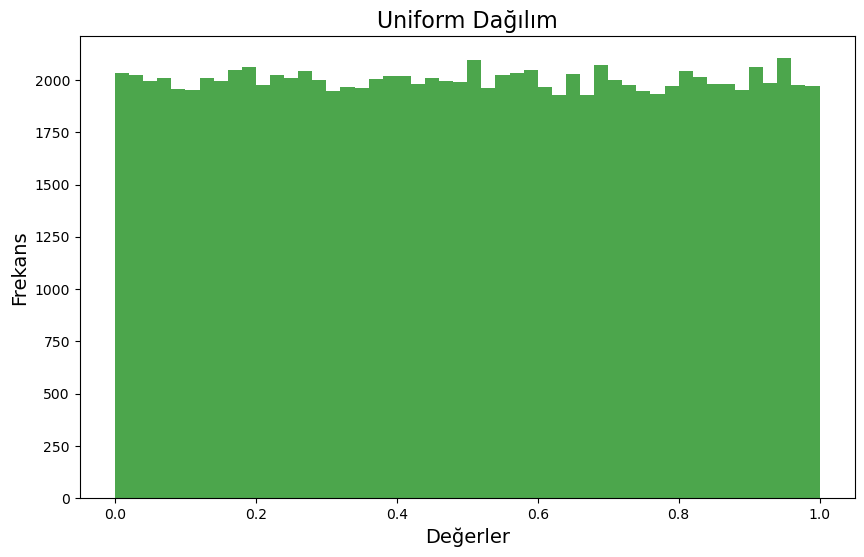

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('Uniform Dağılım', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

In [63]:
df.head()

,Değerler,Normalize Edilmiş Değerler
0,4.919658,0.491970
1,5.437361,0.543740
2,9.110332,0.911041
3,1.697467,0.169747
4,6.387932,0.638799


In [64]:
df.tail()

,Değerler,Normalize Edilmiş Değerler
99995,0.600409,0.060040
99996,3.121997,0.312202
99997,1.414683,0.141469
99998,8.009223,0.800929
99999,0.339440,0.033943


In [65]:
df['Değerler'].describe()

count    100000.000000
mean          4.995829
std           2.888141
min           0.000012
25%           2.491231
50%           4.998146
75%           7.496414
max           9.999909
Name: Değerler, dtype: float64

In [66]:
df['Normalize Edilmiş Değerler'].describe()

count    100000.000000
mean          0.499587
std           0.288817
min           0.000000
25%           0.249124
50%           0.499819
75%           0.749648
max           1.000000
Name: Normalize Edilmiş Değerler, dtype: float64

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [67]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

0

In [68]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

0

<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>
<h1 style="color:red;">__________________________________________________</h1>

<h1 style="color:purple;">Python İle T Student Dağılımlı Veri Üzerinde Min-Max Normalizasyonu</h1>

In [69]:
data = np.random.standard_t(df=5, size=100000)
df = pd.DataFrame(data, columns=['Değerler'])

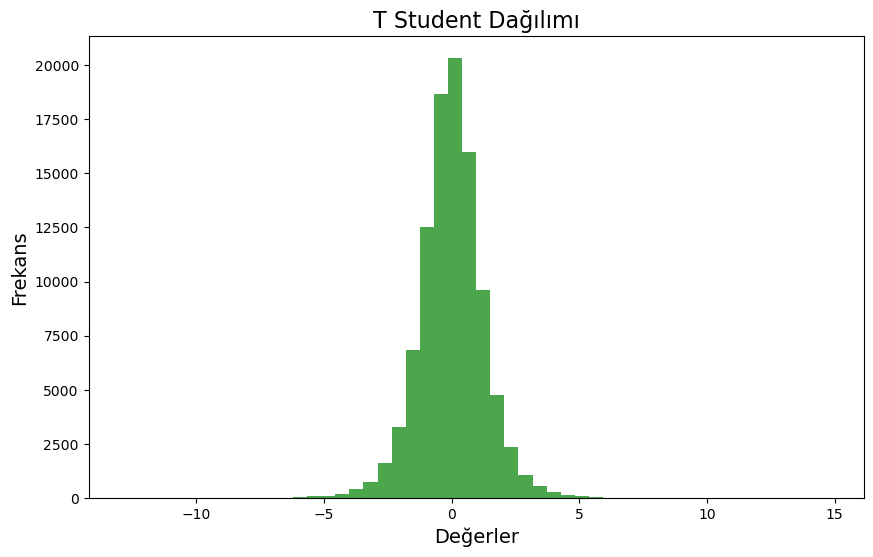

In [70]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df,bins=50, color='green', alpha=0.7)
plt.title('T Student Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;">Adım - 1 )  Minimum ve Maksimum Değerlerin Bulunması:</h4>

In [71]:
min_val = df['Değerler'].min()
max_val = df['Değerler'].max()

<h4 style="color:green;">Adım - 2 ) Yeni Değerlerin Hesaplanması:</h4>

In [72]:
df['Normalize Edilmiş Değerler'] = (df['Değerler'] - min_val) / (max_val - min_val)


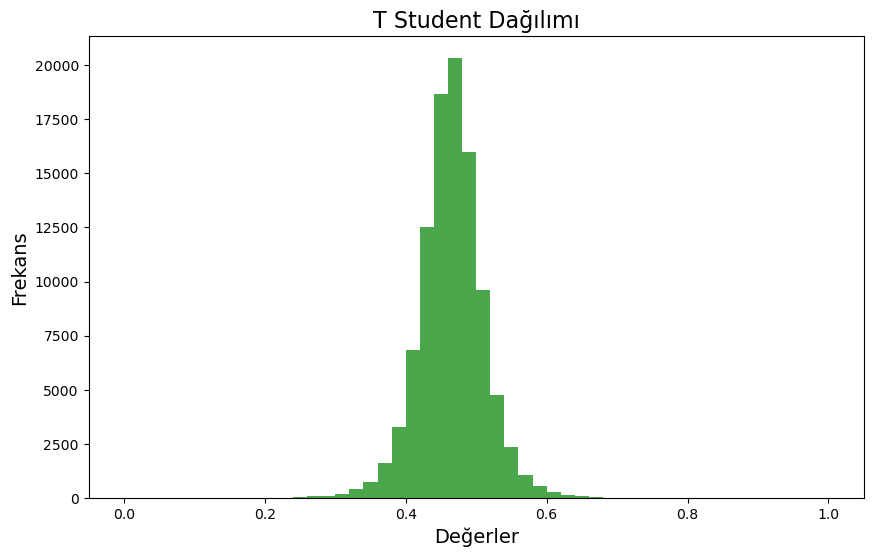

In [73]:
# Veriyi görselleştir
plt.figure(figsize=(10, 6))
plt.hist(df['Normalize Edilmiş Değerler'], bins=50, color='green', alpha=0.7)
plt.title('T Student Dağılımı', fontsize=16)
plt.xlabel('Değerler', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.show()

<h4 style="color:green;"> Aykırı Değer Tespiti</h4>


In [74]:
Q1 = df['Değerler'].quantile(0.25)
Q3 = df['Değerler'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Değerler'] < lower_bound) | (df['Değerler'] > upper_bound)]
len(outliers)

3385

In [75]:
Q1 = df["Normalize Edilmiş Değerler"].quantile(0.25)
Q3 = df["Normalize Edilmiş Değerler"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Normalize Edilmiş Değerler"] < lower_bound) | (df["Normalize Edilmiş Değerler"] > upper_bound)]
len(outliers)

3385